In [1]:
import PIL
import polars as pl

In [3]:
train = pl.read_csv("/content/drive/MyDrive/full_train_dataset_features.csv")
test = pl.read_csv("/content/drive/MyDrive/full_test_dataset_features.csv")


In [4]:
train.describe()

describe,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,…,f977,f978,f979,f980,f981,f982,f983,f984,f985,f986,f987,f988,f989,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,…,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0,190527.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-2.006663,3.623666,0.805061,0.331629,1.042292,0.076213,0.100472,-0.617528,-0.736459,-1.25223,-2.625054,-2.886196,-1.856188,-0.812758,-2.892326,-0.58459,-2.573195,-2.737979,-1.884225,-1.925836,-2.14782,-2.212597,-0.241241,-0.358798,-1.820641,-2.684323,0.281734,-1.069136,-1.854138,4.026485,-3.294569,-2.633,-1.928854,0.108725,1.04934,-1.794067,…,1.707234,2.059446,0.89716,5.572561,-1.567782,4.21227,0.10308,-1.267061,0.374426,-2.708685,1.53011,-1.65683,0.726354,-2.100797,-1.510677,-1.571381,-2.95143,-2.373076,-1.119483,-1.624733,-3.408879,1.503753,3.320592,0.088827,0.101933,0.157636,0.516399,0.042634,0.321975,0.195584,0.108221,0.311982,0.106704,0.452613,0.022574,0.041485,0.565831
"""std""",1.025138,1.211047,1.371424,1.190012,1.184408,1.231058,1.396033,1.045145,1.114139,1.122574,0.956547,1.008099,0.971429,0.99737,1.000212,0.981723,0.916759,0.946016,0.924324,0.855294,1.092982,1.206387,1.212007,1.185621,0.979727,0.977312,1.214436,1.058871,1.048163,1.513647,1.063671,1.080885,1.072069,1.200537,1.146476,1.055099,…,1.137344,1.178976,1.315496,2.117276,1.045553,1.44613,1.22125,0.920309,1.483542,1.056388,1.319503,1.097506,1.216101,1.170458,1.145247,1.02228,1.009975,1.223721,1.124774,1.180731,1.038992,1.50012,1.468601,0.284495,0.302561,0.364401,0.499732,0.202032,0.467235,0.396651,0.31066,0.463304,0.308737,0.497751,0.148542,0.199409,0.495649
"""min""",-6.973734,-2.828301,-6.072824,-5.362997,-4.450101,-5.790792,-6.739608,-5.574106,-5.367743,-6.581531,-7.215495,-8.028114,-6.335515,-5.009046,-7.814235,-5.135681,-7.02177,-8.259694,-6.615915,-5.920104,-7.9154,-8.49678,-6.506123,-5.550206,-6.162768,-7.277886,-4.668448,-6.210089,-6.880047,-2.953901,-9.260235,-8.084476,-6.995367,-5.321433,-5.633277,-7.02411,…,-2.932582,-3.622977,-5.208251,-4.305551,-6.02454,-2.276673,-5.633915,-5.246699,-6.077741,-7.933698,-3.443924,-6.887376,-4.333306,-7.814874,-8.209533,-6.536851,-8.013695,-7.630174,-6.305067,-6.941329,-8.846877,-4.357923,-1.855121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",2.8801546,10.202443,7.96754,8.263607,7.8428407,6.6573234,8.1380205,4.4184985,5.282254,4.3003473,2.4726892,2.8635063,3.0274458,4.283571,1.6226586,4.6204424,1.9121206,2.0747473,2.8692205,2.6027958,3.3415818,4.4953403,5.5714607,5.780073,3.4650273,2.4483604,6.558261,4.405601,3.8734243,11.906067,2.7490745,3.8831103,4.402426,5.871784,7.3664126,4.2864027,…,7.7908072,7.750842,7.691128,15.1464,3.5343

In [5]:
test.describe()

describe,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,…,f977,f978,f979,f980,f981,f982,f983,f984,f985,f986,f987,f988,f989,f990,f991,f992,f993,f994,f995,f996,f997,f998,f999,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,…,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-1.970652,3.738201,0.856458,0.344419,1.093325,0.015293,0.050088,-0.591766,-0.71916,-1.331615,-2.632648,-3.034231,-1.955664,-0.832987,-2.934144,-0.582645,-2.54054,-2.72074,-1.938744,-1.854488,-2.103127,-2.314581,-0.299287,-0.382676,-1.904014,-2.762449,0.327191,-1.118784,-1.883699,4.228221,-3.207234,-2.530538,-1.93243,0.23147,1.093887,-1.786279,…,1.701696,2.013646,0.941143,5.484733,-1.698265,4.440886,-0.015034,-1.285213,0.75941,-2.525728,1.718876,-1.475482,0.761347,-1.981356,-1.353656,-1.555351,-2.945094,-2.243605,-0.894831,-1.306368,-3.212639,1.671144,3.406565,0.136,0.094,0.192,0.424,0.052,0.262,0.192,0.108,0.278,0.066,0.4,0.026,0.042,0.5
"""std""",1.032257,1.195255,1.410175,1.194558,1.205577,1.297585,1.381822,1.085532,1.14244,1.132048,0.958795,1.029728,0.954366,0.962029,0.944663,1.004833,0.922742,0.950393,0.947416,0.854993,1.095907,1.319464,1.267125,1.210789,1.008788,0.993193,1.208153,1.056237,1.068302,1.584111,1.02834,1.16025,1.053535,1.239359,1.103107,1.043611,…,1.153311,1.164017,1.263393,2.048825,1.05229,1.514355,1.210159,0.924654,1.49229,1.160611,1.373638,1.127245,1.173186,1.174877,1.184454,1.012446,1.045537,1.269474,1.083439,1.233713,1.099141,1.447403,1.450764,0.343132,0.292121,0.394268,0.494685,0.222249,0.440163,0.394268,0.310691,0.448462,0.248531,0.490389,0.159295,0.20079,0.500501
"""min""",-4.740509,0.30093,-3.724772,-3.548846,-2.446975,-4.036248,-3.733589,-3.918364,-3.656889,-4.23096,-5.668057,-6.324666,-4.802826,-3.407969,-6.077539,-4.116379,-5.601607,-5.584932,-4.594572,-4.526129,-5.209936,-7.845847,-4.019784,-4.685681,-4.998205,-6.066916,-2.763751,-4.322078,-6.456159,-0.669841,-6.644273,-6.576286,-4.995281,-2.703925,-2.248665,-4.644833,…,-1.517582,-2.014077,-2.551813,-0.307078,-4.086364,0.405132,-3.766977,-4.350936,-3.472742,-6.41299,-2.197274,-4.844787,-2.83518,-5.480659,-4.605711,-4.212531,-6.06943,-5.910642,-4.365037,-5.028802,-6.323704,-2.956376,-0.594889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",0.995157,8.552216,5.22018,4.701794,4.657381,4.116308,6.121141,3.3013184,3.1215398,1.4843266,0.143333,0.342885,1.1311134,2.399372,-0.189135,2.1963823,0.024669,0.059638,1.2408286,0.676657,1.0573289,1.4756502,3.696666,3.5127738,1.8001583,0.9397978,5.173565,3.6814718,2.5686703,9.199431,0.226249,0.5064731,1.036142,4.257242,4.0842795,2.8932083,…,4.940577,5.601633,4.935771,13.084344,1.3941699,8.3220625,5.1975174,1.2610929,4.438311,0.9068471,6.338424,1.806844,4.3688784,1.9466182,2.2147377,0.920911,1.0605636,1.5062033,2.5367634,3.239705,0.4012537,6.8204546,9.355946,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"""median""",-2.047835,3.7224606,

In [6]:
from sklearn.model_selection import train_test_split
# Split into training and testing data
X_train = train.drop([f"t{i}" for i in range(14)]).to_pandas()
y_train = train[[f"t{i}" for i in range(14)]].to_pandas()
X_test = test.drop([f"t{i}" for i in range(14)]).to_pandas()
y_test = test[[f"t{i}" for i in range(14)]].to_pandas()


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((190527, 1000), (190527, 14), (500, 1000), (500, 14))

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=500)
pca_x_train = pca.fit_transform(X_train)

In [12]:
pca.explained_variance_ratio_.sum()

0.9842503175318091

In [13]:
pca_x_test = pca.transform(X_test)

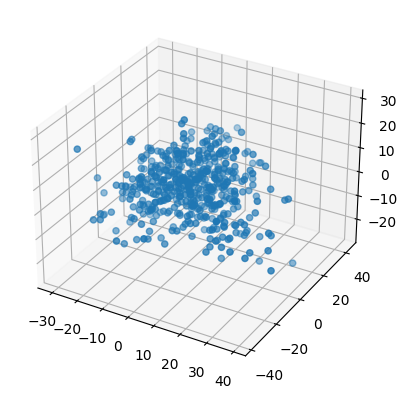

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(pca_x_test[:,0],pca_x_test[:,1],pca_x_test[:,2])

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(pca_x_train, y_train)

# Get predictions for test data
y_test_pred = multilabel_classifier.predict(pca_x_test)

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_test, y_test_pred)


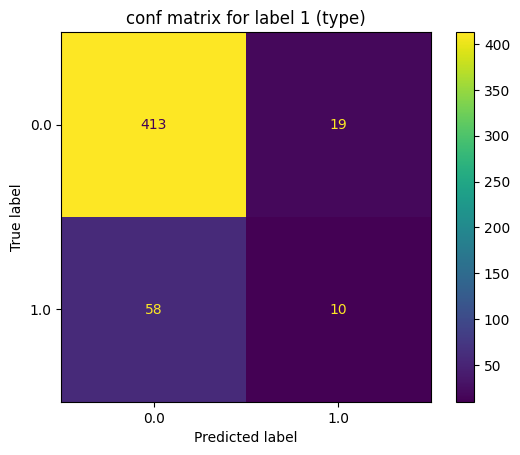

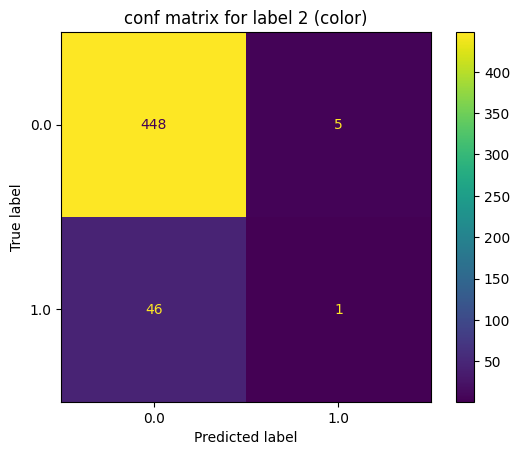

In [17]:
import numpy as np
cmd = ConfusionMatrixDisplay(matrices[0],display_labels=np.unique(y_test)).plot()
plt.title('conf matrix for label 1 (type)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1],display_labels=np.unique(y_test)).plot()
plt.title('conf matrix for label 2 (color)')
plt.show()

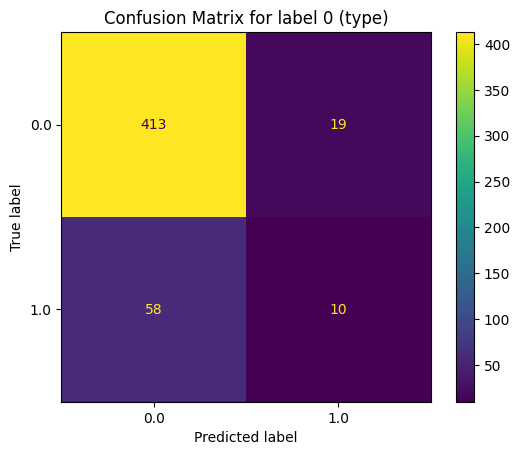

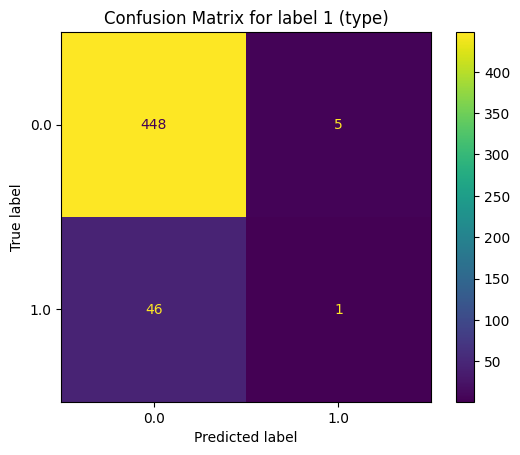

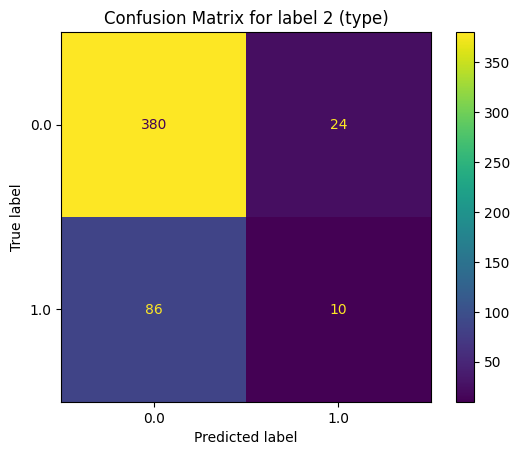

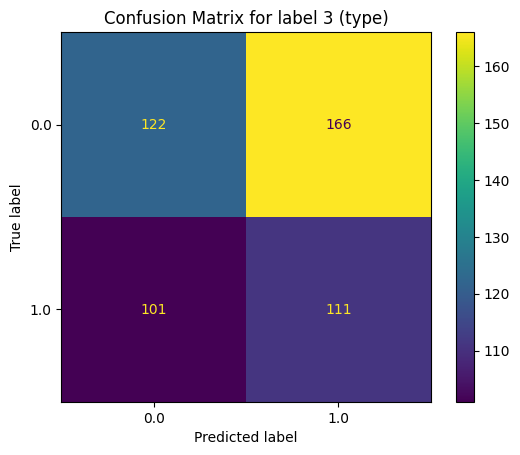

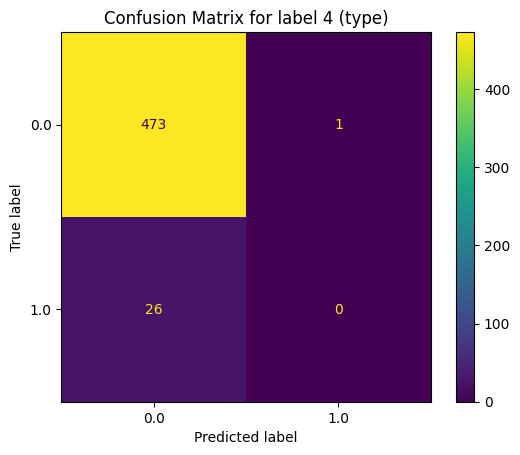

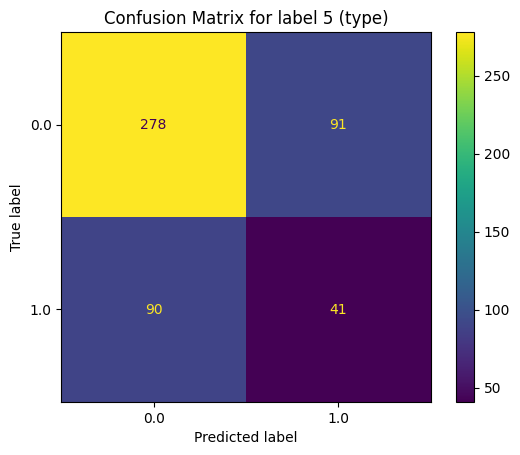

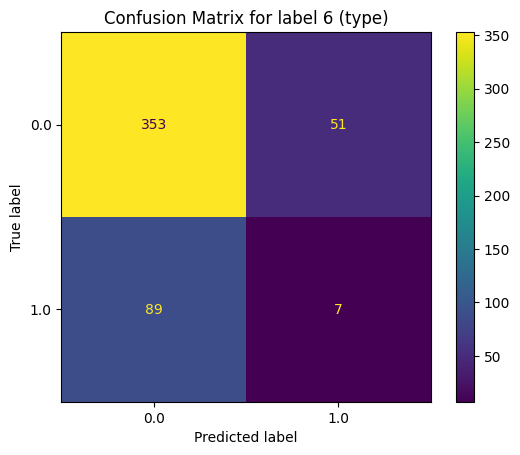

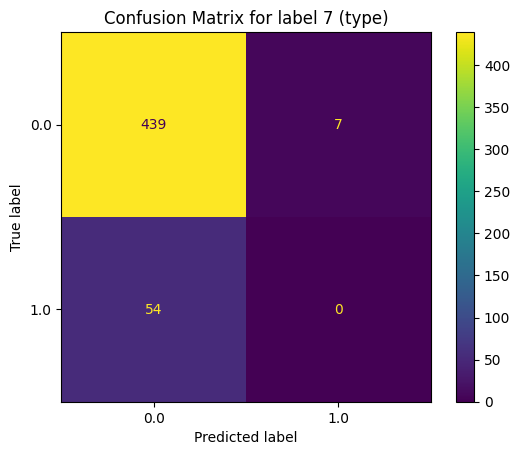

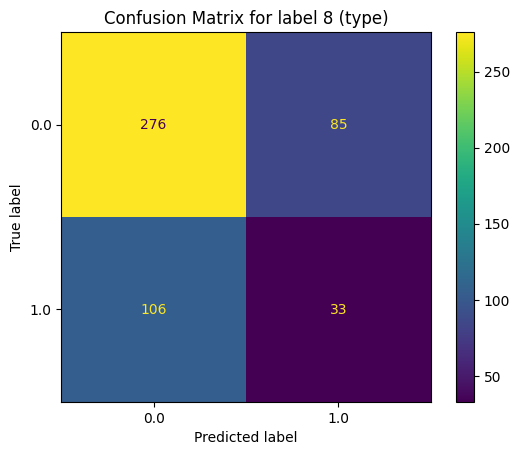

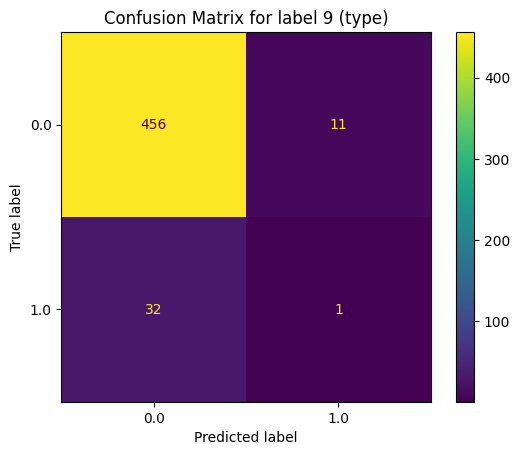

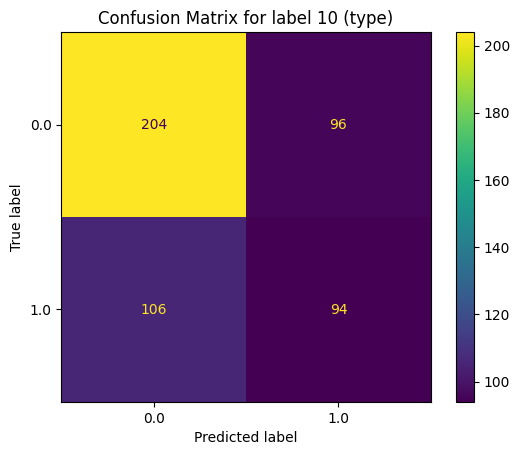

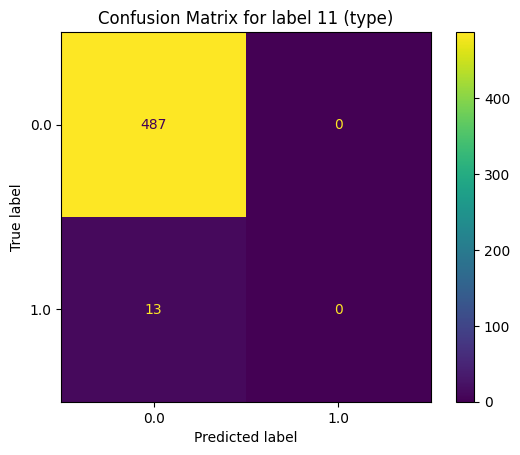

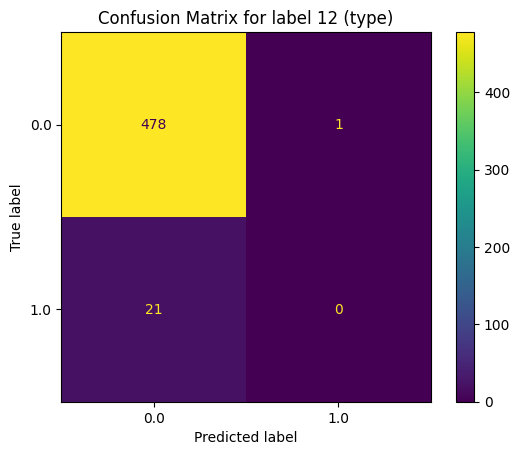

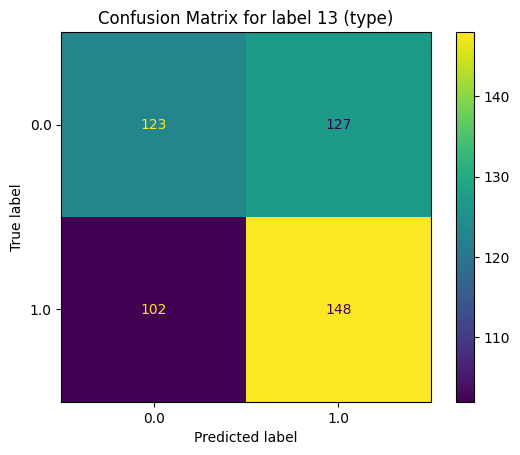

In [18]:
for i in range(14):
  cmd = ConfusionMatrixDisplay(matrices[i], display_labels=np.unique(y_test)).plot()
  plt.title(f'Confusion Matrix for label {i} (type)')
  plt.show()

In [19]:
import joblib

In [21]:
joblib.dump(multilabel_classifier, "svm.joblib")

['svm.joblib']

In [22]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_test_pred,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.60
